
### Equipo:
- 727671 - Daniela Natalia Barajas García
- 733462 - Lucía Cruz Ramírez
- 733481 - Elías Hernández Alarcón
- 728469 - Juan Pedro Sánchez Galaz

In [3]:
import pandas as pd

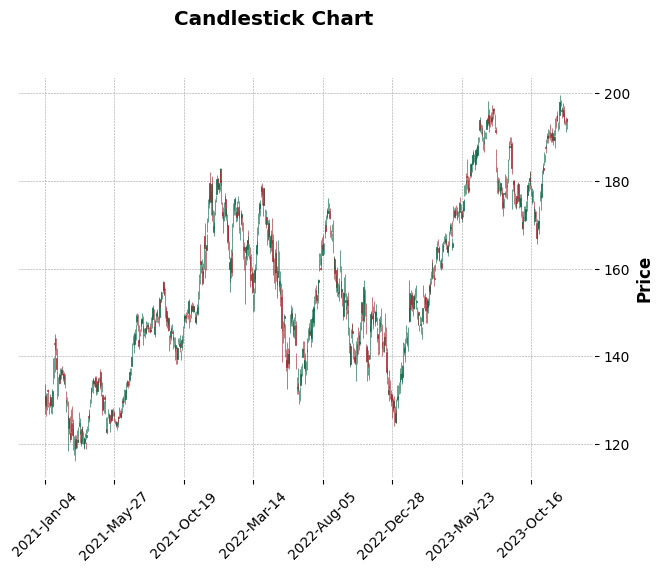

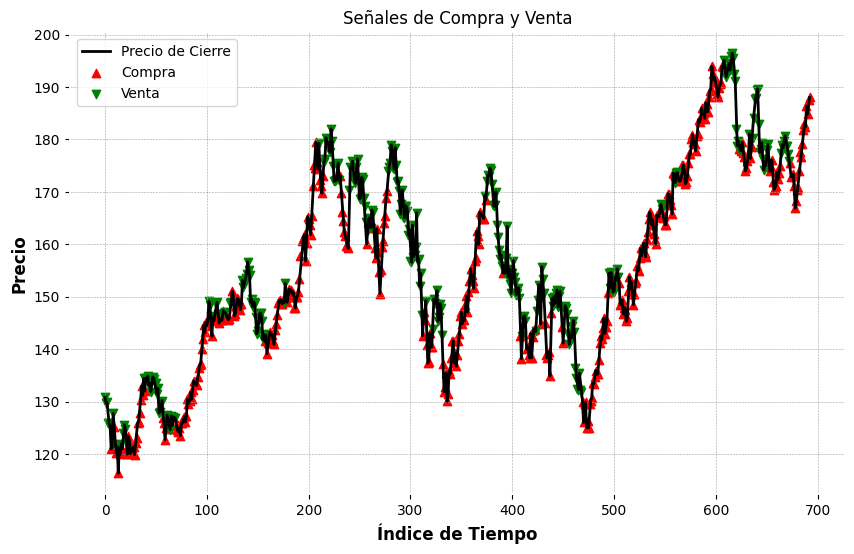

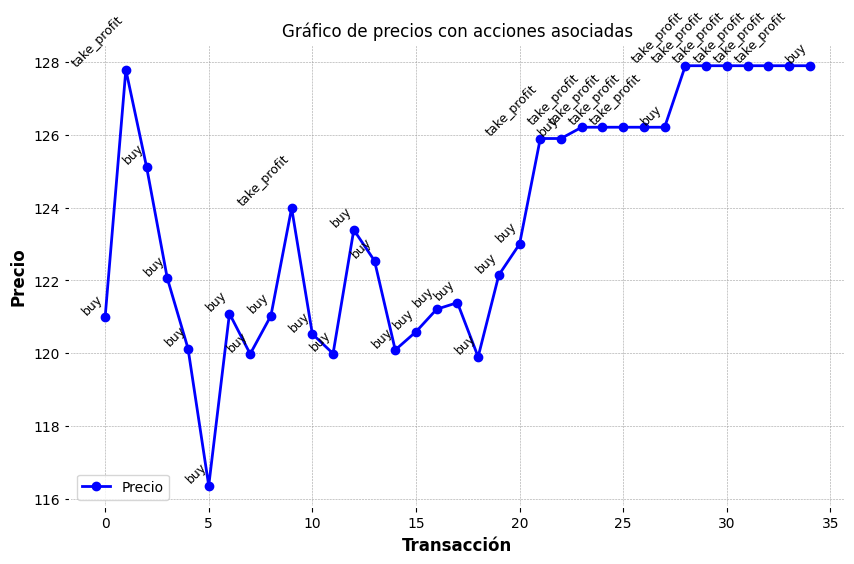

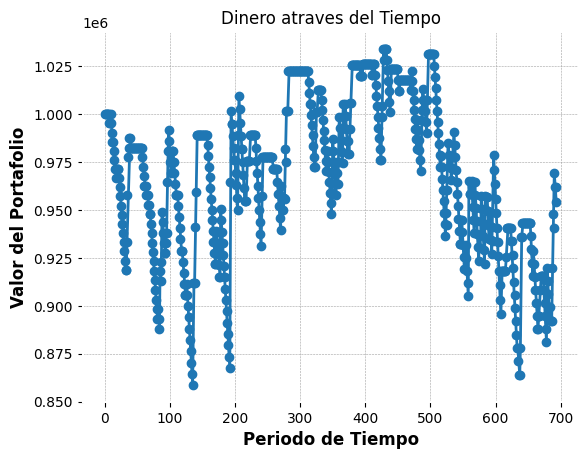

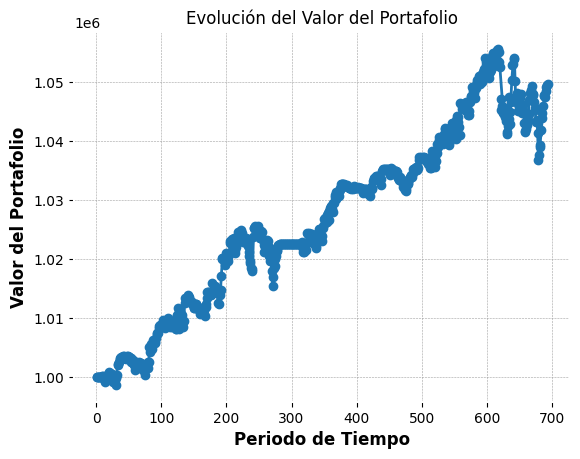

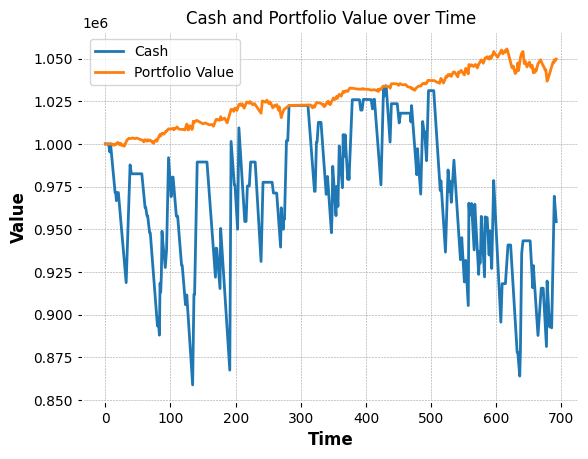

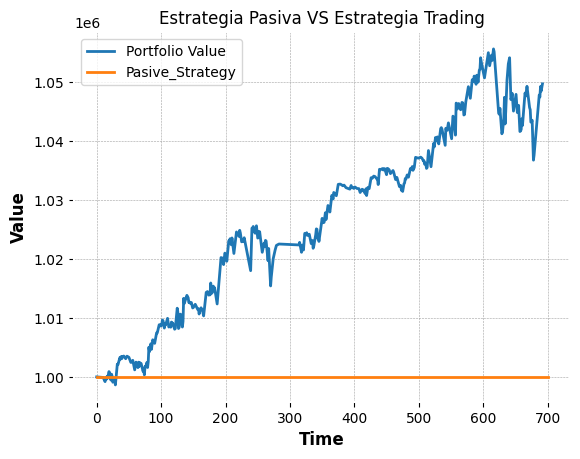

In [4]:
from utils.utils import file_features, buy_signals, sell_signals, plot_buy_sell_signals, backtest, data_fun, plot_operations_history
file_path = "data/aapl_1d_test.csv"

# Machine Learning

Nuestro proyecto de análisis de machine learning se centra en la exploración y modelado de conjuntos de validación proporcionados durante las primeras etapas del curso. En particular, nos sumergimos en la información financiera de la empresa AAPL (Apple Inc.), examinando meticulosamente sus datos de precios de cierre, máximos, mínimos, y otros indicadores relevantes.

In [5]:
data_1m_test = pd.read_csv(file_path)
data_1m_test = data_1m_test.dropna()
data_1m_test.head()

,Date,Open,High,Low,Close,Adjusted_close,Volume
0,2021-01-04,133.52,133.61,126.76,129.41,127.1642,143301900
1,2021-01-05,128.89,131.74,128.43,131.01,128.7364,97664900
2,2021-01-06,127.72,131.05,126.38,126.60,124.4029,155088000
3,2021-01-07,128.36,131.63,127.86,130.92,128.6480,109578200
4,2021-01-08,132.43,132.63,130.23,132.05,129.7583,105158200


Como podemos observar, los precios de las acciones de Apple han experimentado un rango considerable en un período de casi 700 días, oscilando desde los 120 hasta los 200. Esta variabilidad en el precio sugiere una notable volatilidad en el mercado de acciones de Apple durante este período de tiempo.

La volatilidad en los precios de las acciones de Apple indica fluctuaciones significativas en el valor de mercado de la empresa a lo largo del período analizado. Este rango amplio de precios refleja la incertidumbre y la dinámica inherentes al mercado de valores, donde factores económicos, noticias corporativas y condiciones del mercado pueden influir en la percepción de los inversionistas y, por ende, en los precios de las acciones.

<Axes: >

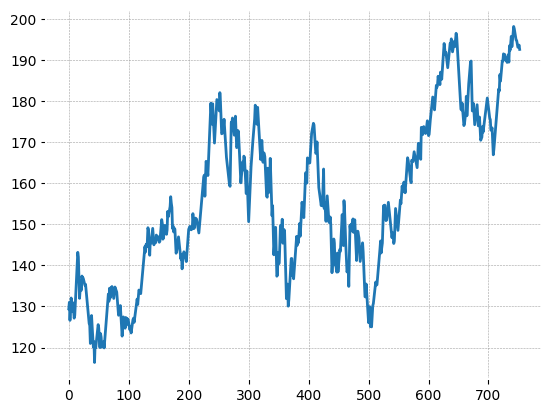

In [6]:
data_1m_test['Close'].plot()

## Modelos de Machine Learning

* 1. Logistic Regression:

Definición: Logistic Regression es un modelo de clasificación que se emplea para predecir la probabilidad de ocurrencia de un evento binario.
Características: Se trata de un modelo lineal que utiliza la función logística para calcular las probabilidades.
Hiperparámetros: Entre los hiperparámetros más relevantes se encuentran el parámetro de regularización (C), que controla la fuerza de la regularización, y la técnica de regularización (L1 o L2).
Funcionamiento: Logistic Regression calcula la probabilidad de que una instancia pertenezca a una clase utilizando la función logística, y posteriormente aplica un umbral para clasificar las instancias en una clase u otra.

* 2. Support Vector Machine (SVM):

Definición: SVM es un modelo de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión.
Características: SVM busca encontrar el hiperplano que mejor separa las clases en el espacio de características.
Hiperparámetros: Entre los hiperparámetros clave se incluyen el tipo de kernel (lineal, polinomial, radial, etc.), el parámetro de regularización (C) y el parámetro del kernel (gamma).
Funcionamiento: SVM mapea los datos de entrada a un espacio de características de alta dimensión donde busca encontrar el hiperplano que maximiza el margen entre las clases.

* 3. XGBoost:

Definición: XGBoost es una implementación de Gradient Boosting que se utiliza ampliamente en competiciones de ciencia de datos y machine learning.
Características: XGBoost es altamente eficiente y escalable, y puede manejar conjuntos de datos grandes con millones de instancias y características.
Hiperparámetros: Algunos hiperparámetros clave incluyen la tasa de aprendizaje (learning rate), el número de árboles (n_estimators), la profundidad máxima del árbol (max_depth) y la función de pérdida.
Funcionamiento: XGBoost funciona mediante la construcción secuencial de árboles de decisión débiles, donde cada árbol se entrena para corregir los errores del modelo anterior.

## Definicion de variables independientes y dependiente

Con los conjuntos de datos proporcionados, se procede a la definición de nuevos dataframes que contienen las variables independientes junto con la variable dependiente ("response") para su posterior entrenamiento. Es importante destacar que se generan dos conjuntos de datos distintos: uno referente a las transacciones de compra y no compra, y otro relativo a las transacciones de venta y no venta. 

In [7]:
data_test_long = file_features(data_1m_test, ds_type="buy")
data_test_buy = file_features(data_1m_test, ds_type="sell")
global_buy_signals = buy_signals(data_test_long)
global_sell_signals = sell_signals(data_test_buy)

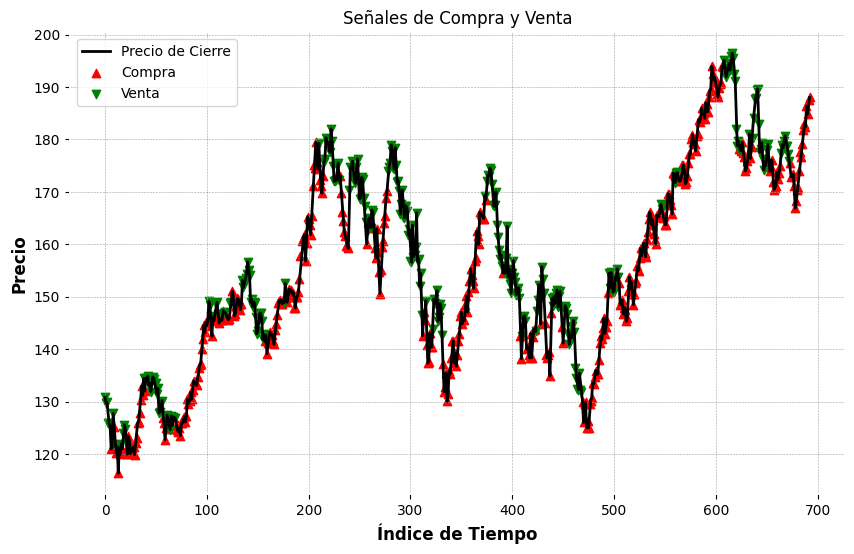

In [8]:
plot_buy_sell_signals(global_buy_signals, global_sell_signals, data_test_long)

In [9]:
global_buy_signals = buy_signals(data_test_long)
global_sell_signals = sell_signals(data_test_buy)
global_buy_signals.head()

,predicciones_lr,predicciones_svm,predicciones_xgboost
0,True,True,False
1,True,True,False
2,True,True,False
3,True,True,False
4,False,True,False


Para el análisis de machine learning propuesto, se establece una metodología que se sustenta en los siguientes puntos:
    
* Variables Independientes y Lagging:

La metodología se apoya en variables independientes, específicamente el precio de cierre (close price) de los activos financieros. Se genera un enfoque de lagging, el cual implica la creación de nuevas columnas que contienen información rezagada en el tiempo. Estas columnas con rezagos ayudan a capturar tendencias y patrones temporales en los datos históricos.
La inclusión de rezagos en el conjunto de datos es fundamental para mejorar el poder predictivo del modelo. Al considerar información pasada, el modelo puede identificar correlaciones y patrones que podrían afectar el comportamiento futuro de los precios.
Indicadores Técnicos CMF y RSI:

* Se integran indicadores técnicos clave en el análisis, como el Money Flow Index (CMF) y el Relative Strength Index (RSI).

Estos indicadores son herramientas comúnmente utilizadas en el análisis técnico de los mercados financieros.
El CMF es un indicador que evalúa el flujo de dinero dentro o fuera de un activo durante un período determinado, ayudando a identificar posibles cambios en la tendencia de precios.
Por otro lado, el RSI es un indicador que mide la fuerza y la velocidad del movimiento de los precios, permitiendo identificar condiciones de sobrecompra o sobreventa en un mercado.
La inclusión de estos indicadores en el análisis brinda al modelo una perspectiva más amplia sobre la dinámica del mercado y puede ayudar a identificar oportunidades de trading potenciales.
Volatilidad:

* La volatilidad es un componente crítico en el análisis de los mercados financieros. 

Se calcula como la medida de la variabilidad de los precios de un activo durante un período de tiempo específico. 
La inclusión de la volatilidad en el análisis permite al modelo tener en cuenta la incertidumbre y el riesgo asociado con el comportamiento de los precios.
Además, la volatilidad puede proporcionar información valiosa sobre la estabilidad y la dirección futura de los precios, lo que contribuye significativamente al poder predictivo del modelo.

* Variable dependiente (de respuesta)

Para la variable dependiente, la lógica subyacente se estructura de la siguiente manera: al comparar el precio de cierre actual con el precio de cierre de hace 10 días, se determina la acción a seguir en el mercado. Específicamente, si el precio de cierre actual es mayor que el de hace 10 días, se ejecuta una acción de venta; por el contrario, si es menor, se procede con una acción de compra. Este enfoque se aplica de manera análoga tanto para los conjuntos de datos correspondientes a las transacciones de compra como a las de venta. La definición y aplicación de esta lógica constituyen un aspecto crítico en la construcción de modelos de machine learning destinados a la predicción de movimientos financieros.

In [10]:
data_test_long = file_features(data_1m_test, ds_type="buy")
data_test_buy = file_features(data_1m_test, ds_type="sell")
data_test_long.head()

,CMF,RSI,Volatility,Close_Lag0,Close_Lag1,Close_Lag2,Close_Lag3,Close_Lag4,Close_Lag5,Response
0,-0.150397,41.907869,2.75,130.84,133.19,135.37,135.13,135.39,136.01,False
1,0.003010,39.714419,2.59,129.71,130.84,133.19,135.37,135.13,135.39,False
2,0.084205,40.191750,1.91,129.87,129.71,130.84,133.19,135.37,135.13,False
3,-0.029780,33.319745,4.12,126.00,129.87,129.71,130.84,133.19,135.37,False
4,0.112971,33.099266,8.32,125.86,126.00,129.87,129.71,130.84,133.19,False


## Procesamiento y Fine Tuning

Tras la definición de la variable dependiente y la lógica de operación establecida, el proyecto de análisis de aprendizaje automático avanza hacia la fase de preparación de datos y ajuste de modelos. Este proceso se inicia con la partición de los conjuntos de datos en conjuntos de entrenamiento y pruebas, lo que proporciona una base sólida para evaluar el rendimiento de los modelos de aprendizaje automático.

Una vez divididos los conjuntos de datos, se da inicio al proceso de ajuste de hiperparámetros, también conocido como finetuning. En este contexto, el finetuning implica la optimización de los parámetros de los modelos de aprendizaje automático con el fin de identificar las combinaciones óptimas que maximicen el rendimiento predictivo del modelo.

Durante el proceso de finetuning, se exploran y ajustan los hiperparámetros de los modelos, tales como la tasa de aprendizaje, la profundidad del árbol de decisión, el número de vecinos en el algoritmo de vecinos más cercanos, entre otros. Esta exploración exhaustiva permite determinar qué combinaciones de hiperparámetros son más efectivas para cada modelo en particular.

A continuacion se presenta la grafica de como se ven las opciones de compra o venta ya con los parametros optimos, y la mejor estrategia, esto siguien el precio de cierre de la accion. 

## Optimizacion y backtesting

Una vez se han determinado los mejores parámetros para cada modelo mediante el proceso de finetuning, el proyecto de análisis de aprendizaje automático procede a realizar un proceso de combinaciones con backtesting. Este enfoque busca identificar el mejor modelo y los mejores parámetros a través de la evaluación del rendimiento financiero, específicamente a través del análisis del profit.

El backtesting implica la simulación de estrategias de trading utilizando datos históricos para evaluar el rendimiento de cada modelo y sus parámetros optimizados. Durante este proceso, se aplican las estrategias definidas previamente con los conjuntos de datos históricos para determinar su efectividad en términos de rentabilidad financiera.

El objetivo principal del backtesting es identificar la estrategia de trading que genere el mayor profit o beneficio. Este profit se calcula a partir de las ganancias y pérdidas generadas por las operaciones realizadas según las señales de compra y venta generadas por cada modelo y sus respectivos parámetros.

Al finalizar el proceso de optimización y backtesting, el código proporciona como resultado el mejor modelo, junto con los parámetros óptimos identificados durante el backtesting. Estos resultados representan la estrategia de trading más efectiva y rentable, basada en el análisis histórico de datos y la evaluación de su desempeño financiero.

Se presenta la funcion de backtesting que devuelve los parametros, y la grafica de los primeros 35 datos, ya con la funcion del backtesting y los parametros optimizados obtenidos por el proceso.

In [11]:
data_1m = data_fun(file_path)
portfolio_values, cash_values, operations_history,  = backtest(data_1m, global_buy_signals["predicciones_xgboost"], global_sell_signals["predicciones_xgboost"], 0.88, 1.05, 39)

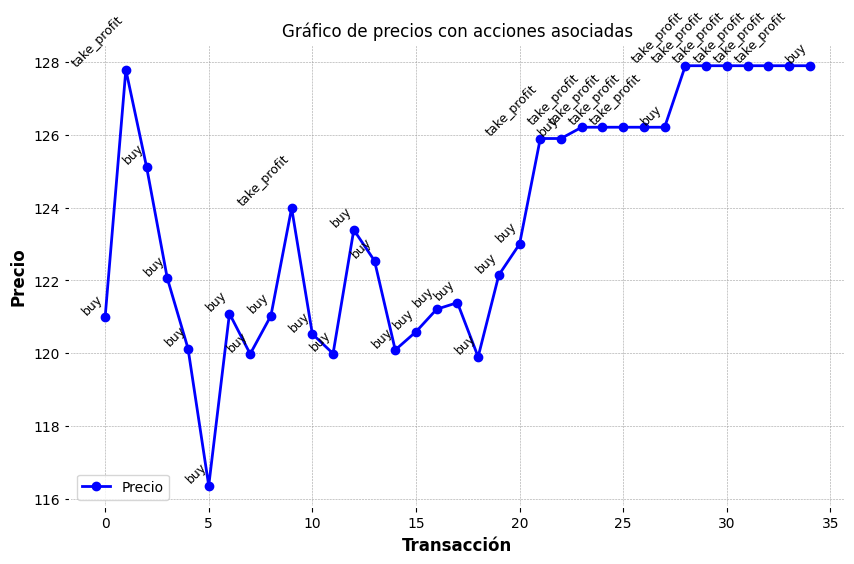

In [12]:
plot_operations = plot_operations_history(operations_history)